In [ ]:
# pip install torch torchvision
# pip install transformers

In [80]:
import pandas as pd
import numpy as np
import urllib.parse
from collections import Counter
import matplotlib.pyplot as plt

# 1 investigate dropped paths

In [8]:
#1 investigate dropped paths

paths_finished = pd.read_csv('wikispeedia_paths-and-graph\paths_finished.tsv', sep='\t', skiprows = 16, header = None, names = ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating'])
paths_unfinished = pd.read_csv('wikispeedia_paths-and-graph\paths_unfinished.tsv', sep='\t', skiprows=17, header = None, names = ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type'])

print('completed paths: ' + str(len(paths_finished)))
print('abandoned due to restart: ' + str(len(paths_unfinished[paths_unfinished['type'] == 'restart'])))
print('abandoned due to timeout: ' + str(len(paths_unfinished[paths_unfinished['type'] == 'timeout'])))

completed paths: 51318
abandoned due to restart: 15552
abandoned due to timeout: 9323


In [3]:
(15552) / (15552 + 9323 + 51318)

0.20411323874896645

In [4]:
paths_unfinished

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout
...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout


In [5]:
paths_finished['hashedIpAddress'].value_counts().head(100)

0d57c8c57d75e2f5    4865
473d6ac602c2b198     545
7d5624e35c9523ef     292
5bb5836b425e6bfe     243
6b039e9953cf075e     231
                    ... 
32a15a982d3fb004      31
7adef3fc2f414c08      31
16f3ba97499b2308      31
25abf3566714fd52      31
3cc73ae144f4f570      30
Name: hashedIpAddress, Length: 100, dtype: int64

# 2. link

In [37]:
from urllib.parse import unquote
link = pd.read_csv('wikispeedia_paths-and-graph\links.tsv', sep='\t', skiprows=12, header = None, names = ['linkSource','linkTarget'])
#Article names are URL-encoded,so it needs to be decoded
link[['linkSource', 'linkTarget']] = link[['linkSource', 'linkTarget']].applymap(unquote)

In [12]:
link

,linkSource,linkTarget
0,Áedán_mac_Gabráin,Bede
1,Áedán_mac_Gabráin,Columba
2,Áedán_mac_Gabráin,Dál_Riata
3,Áedán_mac_Gabráin,Great_Britain
4,Áedán_mac_Gabráin,Ireland
...,...,...
119877,Zulu,South_Africa
119878,Zulu,Swaziland
119879,Zulu,United_Kingdom
119880,Zulu,Zambia


In [13]:
#No missing values
missing_values = link.isnull().sum()
print(missing_values)

linkSource    0
linkTarget    0
dtype: int64


Counting the most frequent articles

In [17]:
source_frequency = link['linkSource'].value_counts()
source_frequency

United_States                     294
Driving_on_the_left_or_right      255
List_of_countries                 244
List_of_circulating_currencies    236
List_of_sovereign_states          216
                                 ... 
Lighting_designer                   1
Soil_structure                      1
Pro_Milone                          1
Soil_profile                        1
Human_dignity                       1
Name: linkSource, Length: 4587, dtype: int64

In [16]:
target_frequency = link['linkTarget'].value_counts()
target_frequency

United_States                  1551
United_Kingdom                  972
France                          959
Europe                          933
England                         751
                               ... 
History_of_Greenland              1
History_of_Arizona                1
History_of_Alaska                 1
Ateneo_de_Manila_University       1
Plains_Zebra                      1
Name: linkTarget, Length: 4135, dtype: int64

In [20]:
hot_articles = pd.concat([source_frequency, target_frequency], axis=1, sort=False)
hot_articles.columns = ['source_count', 'target_count']
hot_articles = hot_articles.fillna(0) 
hot_articles['total_count'] = hot_articles['source_count'] + hot_articles['target_count']
hot_articles.to_csv('hot_articles.csv', header=True)
hot_articles

,source_count,target_count,total_count
United_States,294.0,1551.0,1845.0
Driving_on_the_left_or_right,255.0,0.0,255.0
List_of_countries,244.0,63.0,307.0
List_of_circulating_currencies,236.0,8.0,244.0
List_of_sovereign_states,216.0,43.0,259.0
...,...,...,...
Osteomalacia,0.0,3.0,3.0
Directdebit,0.0,2.0,2.0
Duchenne_muscular_dystrophy,0.0,1.0,1.0
Klinefelter's_syndrome,0.0,1.0,1.0


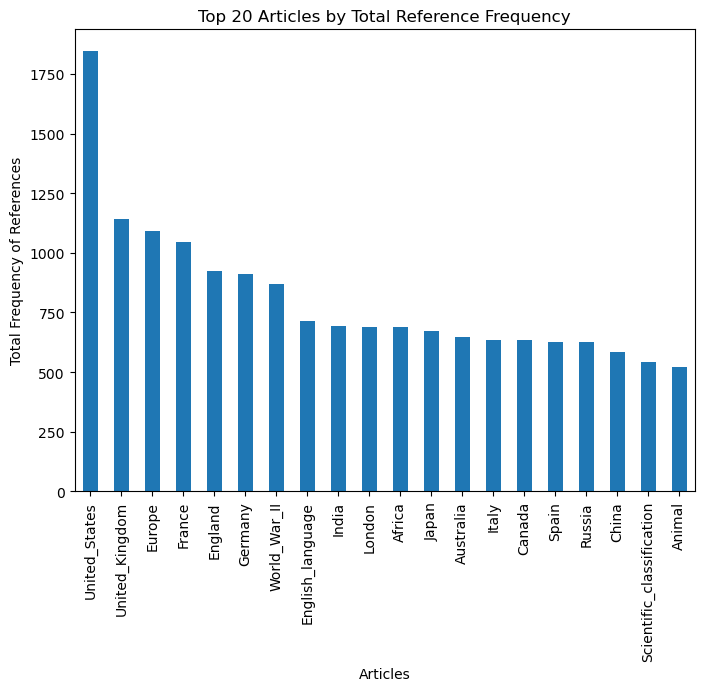

In [26]:
top_articles = hot_articles.sort_values(by='total_count', ascending=False).head(20)

plt.figure(figsize=(8, 6))
top_articles['total_count'].plot(kind='bar')
plt.title('Top 20 Articles by Total Reference Frequency')
plt.xlabel('Articles')
plt.ylabel('Total Frequency of References')
plt.xticks(rotation=90) 
plt.show()

# 3.Categories

In [30]:
categories = pd.read_csv('wikispeedia_paths-and-graph\categories.tsv', sep='\t', skiprows=13, header = None, names = ['article','category'])
categories[['article', 'category']] = categories[['article', 'category']].applymap(unquote)
categories

,article,category
0,Áedán_mac_Gabráin,subject.History.British_History.British_Histor...
1,Áedán_mac_Gabráin,subject.People.Historical_figures
2,Åland,subject.Countries
3,Åland,subject.Geography.European_Geography.European_...
4,Édouard_Manet,subject.People.Artists
...,...,...
5199,Zirconium,subject.Science.Chemistry.Chemical_elements
5200,Zoroaster,subject.People.Religious_figures_and_leaders
5201,Zuid-Gelders,subject.Geography.European_Geography
5202,Zuid-Gelders,subject.Language_and_literature.Languages


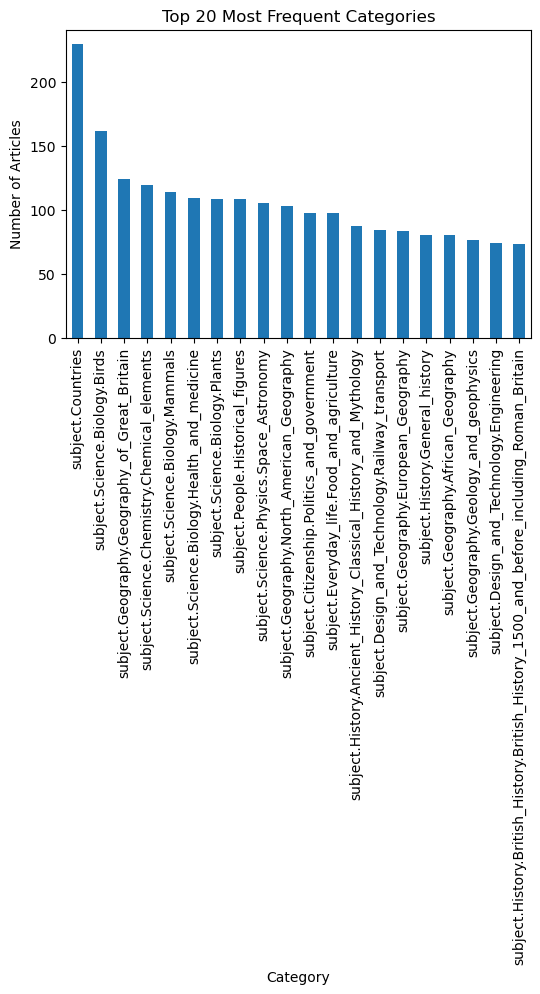

In [34]:
category_counts = categories['category'].value_counts()
top_categories = category_counts.head(20)

plt.figure(figsize=(6, 4))
top_categories.plot(kind='bar')
plt.title('Top 20 Most Frequent Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)  
plt.show()

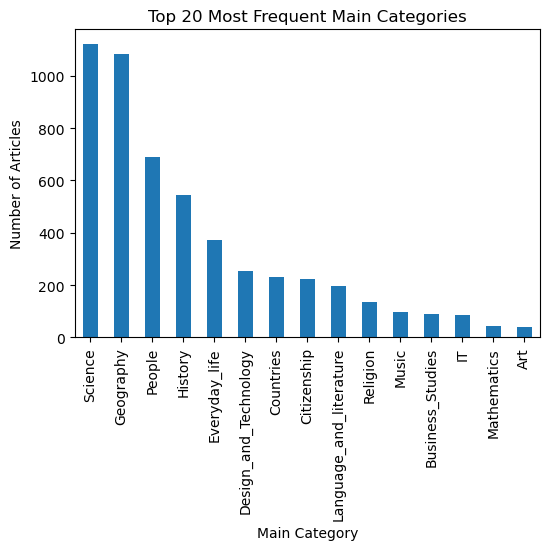

In [36]:
# Split each category string, skip the first part ("subject"), and take the second part as the main category.
categories['main_category'] = categories['category'].apply(lambda x: x.split('.')[1] if len(x.split('.')) > 1 else x)

# Calculate the number of articles for each main category.
main_category_counts = categories['main_category'].value_counts()

top_main_categories = main_category_counts.head(20)

plt.figure(figsize=(6, 4))
top_main_categories.plot(kind='bar')
plt.title('Top 20 Most Frequent Main Categories')
plt.xlabel('Main Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)  
plt.show()

# 4. Path Finished

In [76]:
DATA_FOLDER = 'wikispeedia_datasets/wikispeedia_paths-and-graph/'

In [77]:
paths_finished = pd.read_csv(DATA_FOLDER + 'paths_finished.tsv', sep='\t', skiprows = 16, header = None, names = ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating'])

In [78]:
paths_finished

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0
...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN
51316,19f8284371753362,1298792567,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0


In [79]:
split_data = paths_finished['path'].str.split(';')

In [17]:
split_data

0        [14th_century, 15th_century, 16th_century, Pac...
1        [14th_century, Europe, Africa, Atlantic_slave_...
2        [14th_century, Niger, Nigeria, British_Empire,...
3        [14th_century, Renaissance, Ancient_Greece, Gr...
4        [14th_century, Italy, Roman_Catholic_Church, H...
                               ...                        
51313                 [Yagan, Ancient_Egypt, Civilization]
51314    [Yagan, Folklore, Brothers_Grimm, <, 19th_cent...
51315    [Yagan, Australia, England, France, United_Sta...
51316    [Yarralumla%2C_Australian_Capital_Territory, A...
51317                          [Ziad_Jarrah, Germany, Jew]
Name: path, Length: 51318, dtype: object

In [105]:
def decode_list(url_encoded_list):
    """Decodes url_encoded path."""
    return [urllib.parse.unquote(element).replace(',', '') for element in url_encoded_list]

In [111]:
split_data = split_data.apply(decode_list)

In [112]:
paths_finished['source'] = split_data.apply(lambda x: x[0])
paths_finished['target'] = split_data.apply(lambda x: x[-1])

In [113]:
paths_finished['middle'] = split_data.apply(lambda x: x[1:-1])

In [114]:
flattened_middle = [item for sublist in paths_finished['middle'] for item in sublist]

In [115]:
len(flattened_middle)

244153

In [116]:
# most common articles in the middle (excluding source and target)
Counter(flattened_middle).most_common(30)

[('<', 20561),
 ('United_States', 8824),
 ('Europe', 4319),
 ('United_Kingdom', 3860),
 ('Earth', 3153),
 ('England', 3123),
 ('Africa', 2693),
 ('World_War_II', 2225),
 ('North_America', 1804),
 ('Germany', 1676),
 ('Animal', 1659),
 ('Mammal', 1584),
 ('Human', 1580),
 ('France', 1573),
 ('Science', 1438),
 ('English_language', 1359),
 ('Periodic_table', 1351),
 ('Computer', 1325),
 ('Atlantic_Ocean', 1281),
 ('India', 1188),
 ('Agriculture', 1147),
 ('Asia', 1135),
 ('Plant', 1134),
 ('United_Nations', 1035),
 ('Christianity', 1004),
 ('Japan', 978),
 ('Internet', 950),
 ('Australia', 935),
 ('China', 933),
 ('Russia', 919)]

In [22]:
# most popular source
paths_finished['source'].value_counts().head(10)

Brain       1092
Asteroid    1059
Theatre      931
Pyramid      674
Batman       602
Bird         275
Cat          226
Dog          175
Jesus        145
Beer         135
Name: source, dtype: int64

In [23]:
# most popular target
paths_finished['target'].value_counts().head(10)

Telephone            1134
Viking               1071
Zebra                 955
Bean                  673
Adolf_Hitler          603
Sun                   218
God                   200
Jesus                 197
Wood                  185
Great_white_shark     184
Name: target, dtype: int64

In [32]:
paths_finished['source_target'] = paths_finished['source'] + '_' + paths_finished['target']

In [35]:
# most popular source-target combination
paths_finished['source_target'].value_counts().head(10)

Asteroid_Viking           1043
Brain_Telephone           1040
Theatre_Zebra              905
Pyramid_Bean               642
Batman_Wood                148
Bird_Great_white_shark     138
Batman_The_Holocaust       119
Bird_Adolf_Hitler          107
Beer_Sun                    99
Batman_Banana               69
Name: source_target, dtype: int64

In [117]:
paths_finished['path_steps'] = split_data.apply(lambda x: len(x) - 1)

In [118]:
paths_finished

,hashedIpAddress,timestamp,durationInSec,path,rating,source,target,middle,path_steps
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN,14th_century,African_slave_trade,"[15th_century, 16th_century, Pacific_Ocean, At...",8
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,14th_century,African_slave_trade,"[Europe, Africa, Atlantic_slave_trade]",4
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,14th_century,African_slave_trade,"[Niger, Nigeria, British_Empire, Slavery, Afri...",7
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN,14th_century,Greece,"[Renaissance, Ancient_Greece]",3
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,14th_century,John_F._Kennedy,"[Italy, Roman_Catholic_Church, HIV, Ronald_Rea...",6
...,...,...,...,...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN,Yagan,Civilization,[Ancient_Egypt],2
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0,Yagan,Fiction,"[Folklore, Brothers_Grimm, <, 19th_century, Ch...",8
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN,Yagan,U.S._Open_(tennis),"[Australia, England, France, United_States, Te...",6
51316,19f8284371753362,1298792567,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0,Yarralumla_Australian_Capital_Territory,Abraham_Lincoln,"[Australia, United_States]",3


In [119]:
paths_finished.sort_values(by='path_steps', ascending=False)

,hashedIpAddress,timestamp,durationInSec,path,rating,source,target,middle,path_steps
8046,7f6da01d55086766,1248928447,2205,United_States;Washington%2C_D.C.;Government;Co...,5.0,United_States,English_language,"[Washington_D.C., Government, Corporation, Emp...",434
19961,4f1b9ce764349901,1236685130,2292,Napoleon_I_of_France;United_Kingdom;Great_Brit...,NaN,Napoleon_I_of_France,Recycling,"[United_Kingdom, Great_Britain, England, Indus...",118
6945,4e97d9af4476607f,1248925083,1141,Police_state;Police;United_States;Washington%2...,5.0,Police_state,African_slave_trade,"[Police, United_States, Washington_D.C., <, Wa...",103
27136,0d57c8c57d75e2f5,1290096241,1852,Lake_Toba;Netherlands;Europe;Earth;United_Stat...,5.0,Lake_Toba,Looney_Tunes,"[Netherlands, Europe, Earth, United_States, Fl...",98
22845,0b983de502e0ee53,1315954360,1272,Britney_Spears;Las_Vegas%2C_Nevada;<;Las_Vegas...,5.0,Britney_Spears,Extraterrestrial_life,"[Las_Vegas_Nevada, <, Las_Vegas_Nevada, <, Int...",95
...,...,...,...,...,...,...,...,...,...
23347,321e4b101c5b58ff,1225726660,0,Apple,NaN,Apple,Apple,[],0
50466,43f864c75b2571b5,1350587414,0,William_and_Mary,NaN,William_and_Mary,William_and_Mary,[],0
33832,43f864c75b2571b5,1350587367,0,Abel_Tasman,NaN,Abel_Tasman,Abel_Tasman,[],0
9872,43f864c75b2571b5,1350587395,0,Coal,NaN,Coal,Coal,[],0


In [121]:
paths_finished.path_steps.unique()

array([  8,   4,   7,   3,   6,   5,  12,   9,  15,  14,  13,  26,  16,
        21,   2,  10,  17,  18,  20,  11,   1,  23,  19,  34,  29,  65,
        35,  64,  33,  25,  40,  22,  30,  70,  28,  85,  31,  52,  27,
        24,  37,  48,  39,  45,   0,  71, 103,  41,  49,  32,  51,  57,
        53, 434,  61,  36,  69,  62,  47,  84,  46,  38,  56,  76,  50,
        44,  54,  55,  42, 118,  95,  43,  59,  98,  66,  79,  86,  60,
        68])

# 5. Unfinished Paths

In [44]:
paths_unfinished = pd.read_csv('wikispeedia_datasets/wikispeedia_paths-and-graph/paths_unfinished.tsv', sep='\t', skiprows = 17, header = None, names = ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type'])

In [43]:
paths_unfinished

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout
...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout


In [45]:
split_data_2 = paths_unfinished['path'].str.split(';')

In [47]:
paths_unfinished['source'] = split_data_2.apply(lambda x: x[0])

In [49]:
paths_unfinished.source.value_counts().head(10)

Brain       1021
Pyramid      953
Theatre      892
Asteroid     745
Batman       345
Cat          143
Dog          105
Computer      94
Bird          71
Beer          62
Name: source, dtype: int64

In [50]:
paths_unfinished.target.value_counts().head(10)

Telephone                 1060
Bean                       950
Zebra                      893
Viking                     734
Tiger_Woods                218
Nurse_sharks               124
Three_Laws_of_Robotics     102
Economy_of_India            94
Adolf_Hitler                94
Wood                        93
Name: target, dtype: int64

In [51]:
paths_unfinished['source_target'] = paths_unfinished['source'] + '_' + paths_unfinished['target']

In [53]:
paths_unfinished.source_target.value_counts().head(10)

Brain_Telephone    1004
Pyramid_Bean        944
Theatre_Zebra       872
Asteroid_Viking     727
Batman_Wood          75
Batman_Banana        56
Cat_Computer         43
Aircraft_Google      43
Beer_Sun             43
Cat_Microsoft        42
Name: source_target, dtype: int64

In [54]:
paths_finished['source_target'].value_counts().head(10)

Asteroid_Viking           1043
Brain_Telephone           1040
Theatre_Zebra              905
Pyramid_Bean               642
Batman_Wood                148
Bird_Great_white_shark     138
Batman_The_Holocaust       119
Bird_Adolf_Hitler          107
Beer_Sun                    99
Batman_Banana               69
Name: source_target, dtype: int64

--------------------------------------------------------------

# Wikispeedia Page-Pair Selection

In [ ]:
# isolate the most frequently played page pairs
# select a subset that represent a good distribution
## by this i mean we should ensure variety in categories, variety in how similar origin and goal are, variety in whether games were completed or not completed, etc

# proposed df:

# | pair | % games completed | avg length of game | sd of length of game | category | ... |

# LLM and Prompt Selection

In [ ]:
# show results for different LLMs
# show results for different prompts
# explain selection of LLM and prompt

# Methods

We use this section to demonstrate some of the analysis we will perform once we have LLM-derived Wikispeedia data. 

Human-derived Wikispeedia data is used as a 'stand-in' for LLM-derived data where necessary. 

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

llm_wikispeedia_pairs = pd.read_csv('dependencies/llm_wikispeedia_pairs.csv')
paths_finished = pd.read_csv('dependencies/wikispeedia_paths-and-graph/paths_finished.tsv', sep='\t', skiprows = 16, header = None, names = ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating'])
paths_unfinished = pd.read_csv('dependencies/wikispeedia_paths-and-graph/paths_unfinished.tsv', sep='\t', skiprows=17, header = None, names = ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type'])
pfin_etc = pd.concat([paths_finished['path'].str.split(";").apply(lambda path: path[0]), paths_finished['path'].str.split(";").apply(lambda path: path[-1]), paths_finished['path'].str.split(";").apply(lambda path: len(path)), paths_finished['path'].str.split(";").apply(lambda path: path)], axis=1)
pfin_etc.columns = ['origin', 'goal', 'path_l', 'path']
most_popular = pfin_etc.groupby(by=['origin', 'goal']).agg('count').rename(columns={"path_l": "total_pair_rounds"}).sort_values(by='total_pair_rounds', ascending=False).reset_index()[0:10][['origin', 'goal', 'total_pair_rounds']]
most_popular.to_csv('dependencies/top10pairs.csv')

### Are LLM paths sensical to humans?

In [5]:
# pull in BART encodings
# encode concepts in LLM paths
# across all LLM games of length N, find the embedding distance to goal and embedding distances to next page at each round
# plot these curves
# calculate proportion that strictly decrease throughout game
# supplement with Word2Vec embeddings, TF-IDF Wikipage embeddings

In [9]:
# BART

In [ ]:
from transformers import BartTokenizer, BartModel
from scipy.spatial.distance import cosine
import torch

# Load pre-trained model and tokenizer
model = 'facebook/bart-large'
tokenizer = BartTokenizer.from_pretrained(model)
bartm = BartModel.from_pretrained(model)

# List of words to embed
word_list = ['apple', 'orange', 'banana', 'grape', 'pineapple']

# Encode words and retrieve embeddings
word_embeddings = {}
for word in word_list:
    input_ids = tokenizer.encode(word, return_tensors='pt')
    with torch.no_grad():
        output = model(input_ids=input_ids)
    last_hidden_states = output.last_hidden_state.squeeze().mean(dim=0).numpy()
    word_embeddings[word] = last_hidden_states

# Calculate distances between embeddings
distance = cosine(word_embeddings[word1], word_embeddings[word2])


In [ ]:
# TF-IDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample corpus (replace this with your text data)
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the corpus to TF-IDF vectors
tfidf_matrix = vectorizer.fit_transform(corpus)

# Get the feature names (words) in the corpus
feature_names = vectorizer.get_feature_names_out()

# Print the TF-IDF matrix and feature names
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())
print("\nFeature Names:")
print(feature_names)


### Are LLM paths faster or slower than humans'?

In [ ]:
# across all LLM games of pair origin-goal, find the avg rounds needed to complete game
# do the same for human games of pair origin-goal
# match origin-goal pairs across LLM and humans
# perform a t-test on the difference in match averages 

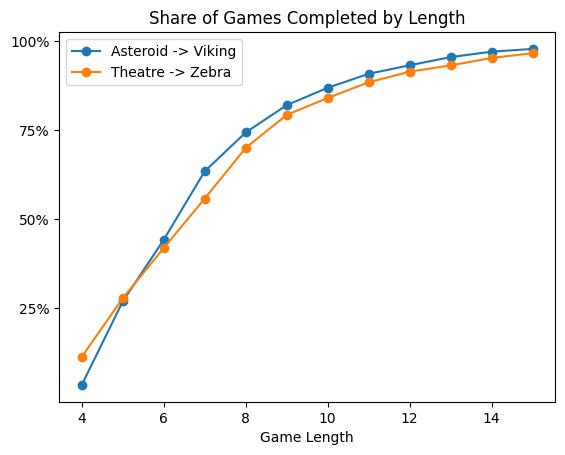

In [173]:
# distribution of game lengths for a couple popular origin-goal pairs
lengths = pd.merge(most_popular, pfin_etc, how='left', on=['origin', 'goal'])
lengths = lengths.groupby(['origin', 'goal', 'path_l']).agg('count') / lengths.groupby(['origin', 'goal']).agg('count')
lengths = lengths['total_pair_rounds'].reset_index().query("(origin == 'Asteroid' and goal == 'Viking') or (origin == 'Theatre' and goal == 'Zebra')")
lengths['cum_completed'] = lengths.groupby(['origin', 'goal'])['total_pair_rounds'].agg('cumsum')
lengths = lengths.query('path_l <= 15')

# graph
groups = lengths.groupby(['origin', 'goal'])
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['path_l'], group['cum_completed'], marker='o', label=(name[0] + " -> " + name[1]))

ax.set_xlabel('Game Length')
ax.set_ylabel('')
ax.set_title('Share of Games Completed by Length')
#ax.set_yscale('log')
ax.set_yticks([.25, .5, .75, 1])
ax.set_yticklabels(['25%', '50%', '75%', '100%'])
ax.legend()
plt.show()

Though the graph above displays cumulative completions rates by game length for two *human*-derived page pairs, once we have LLM-derived data, we can match page pairs between our LLM and humans to observe differences in game length distributions - both at the pair level and in the aggregate.

### Do LLMs employ the same 'zoom-out' to hub, 'zoom-in' to spoke strategy as humans?

In [ ]:
# across all LLM games of length N, calculate average degree (length of prompt list) at each round
# fit curve to quadratic model, perform goodness of fit tests
# stronger version: test for equality of curves between humans and LLM for the same page pair

In [228]:
import urllib.parse
import statsmodels.api as sm

links = {}
df = pd.read_csv('dependencies/wikispeedia_paths-and-graph/links.tsv', sep='\t', skiprows=12, header=None)
for index, row in df.iterrows(): 
    start_page = urllib.parse.unquote(row[0])
    link_page = urllib.parse.unquote(row[1])
    if start_page in links:
        links[start_page].append(link_page)
    else:
        links[start_page] = [link_page]
def get_links_from_wikipedia_page(page_title):
    return links.get(page_title, [])

paths = pd.merge(most_popular, pfin_etc, how='left', on=['origin', 'goal'])
paths['degree_path'] = paths['path'].apply(lambda path: [len(get_links_from_wikipedia_page(page)) for page in path])

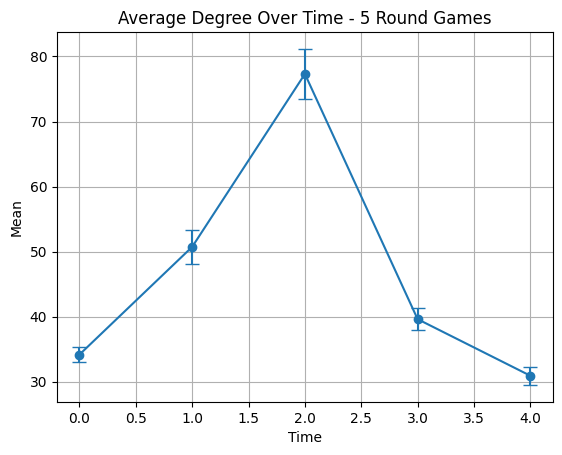

In [239]:
mea_at_stage = {}
moe_at_stage = {}
game_length = 5
for i, row in paths.iterrows():
    if len(row['degree_path']) == game_length:
        for j in range(len(row['degree_path'])):
            if j not in mea_at_stage.keys():
                mea_at_stage[j] = []
            mea_at_stage[j].append(row['degree_path'][j])
for key in mea_at_stage.keys():
    moe_at_stage[key] = 1.96 * (np.std(mea_at_stage[key], ddof=1) / np.sqrt(len(mea_at_stage[key])))
    mea_at_stage[key] = (np.mean(mea_at_stage[key]))
    
mea_at_stage

mean_list = list(mea_at_stage.values())
mofe_list = list(moe_at_stage.values())

plt.errorbar(range(len(mean_list)), mean_list, yerr=mofe_list, fmt='-o', capsize=5)
plt.xlabel('Time')
plt.ylabel('Mean')
plt.title('Average Degree Over Time - 5 Round Games')
plt.grid(True)
plt.show()

The graph above displays average page degree at each stage of 5-round games. Though it is currently for *human*-derived page pairs, once we have LLM-derived data, we can calculate the same averages for such data, and use the function below to check if the resultant curve is strictly concave - which corresponds to a 'zoom-out', 'zoom-in' strategy.

In [240]:
def test_if_concave(means, stages):
    slopes = [(means[i + 1] - means[i]) / (stages[i + 1] - stages[i]) for i in range(len(stages) - 1)]
    is_concave = all(slopes[i + 1] < slopes[i] for i in range(len(slopes) - 1))
    return is_concave

test_if_concave(mean_list, range(len(mean_list)))

False

### Does LLM 'backtrack' behavior differ from humans?

In [187]:
# If LLM cycles, remove intermediary pages and treat cycle as a 'backtrack'
# tbd
paths['degree_path'][0]

[19, 58, 60, 22, 23, 23, 43, 62]